# EDA - train|test

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 0)

import missingno as msno
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

sns.set_style('darkgrid')
tqdm.pandas()

In [2]:
train = pd.read_feather('../input/application_train.ftr')
test = pd.read_feather('../input/application_test.ftr')

In [3]:
n = train.query("TARGET == 0")
p = train.query("TARGET == 1")

In [29]:
train[['CODE_GENDER']].to_feather('gender_train.ftr')

In [27]:
train.filter(regex='APPR').head()

,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,WEDNESDAY,10
1,MONDAY,11
2,MONDAY,9
3,WEDNESDAY,17
4,THURSDAY,11


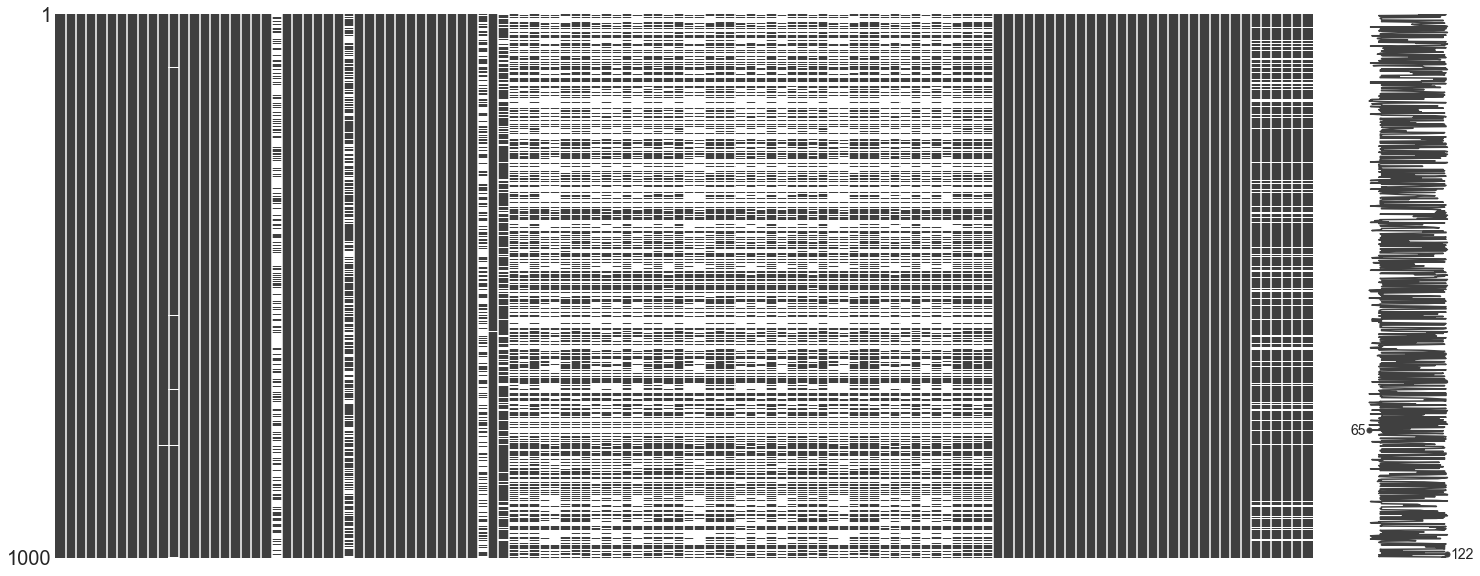

In [21]:
msno.matrix(train.sample(1000))

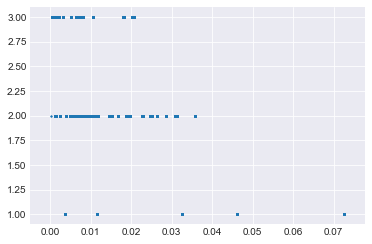

In [27]:
plt.scatter(train.REGION_POPULATION_RELATIVE, train.REGION_RATING_CLIENT, s=1)

In [6]:
train.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
train.AMT_

In [19]:
train.sort_values('REGION_POPULATION_RELATIVE')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
248609,387633,0,Revolving loans,F,Y,Y,1,225000.0,585000.0,29250.0,585000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.000290,-9221,-703,-322.0,-1821,1.0,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,11,1,1,1,1,0,0,Industry: type 12,0.666179,0.692250,0.420611,0.1031,0.0205,0.9940,0.9184,0.0685,0.0400,0.1724,0.2083,0.2083,0.0691,0.0841,0.1525,0.0000,0.0000,0.1050,0.0213,0.9940,0.9216,0.0692,0.0403,0.1724,0.2083,0.2083,0.0707,0.0918,0.1589,0.0000,0.0000,0.1041,0.0205,0.9940,0.9195,0.0690,0.04,0.1724,0.2083,0.2083,0.0703,0.0855,0.1553,0.0000,0.0000,reg oper account,terraced house,0.1574,"Stone, brick",No,6.0,2.0,6.0,2.0,-1709.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
280258,424677,0,Revolving loans,F,N,Y,0,81000.0,225000.0,11250.0,180000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.000290,-21619,365243,-12605.0,-4720,NaN,1,0,0,1,0,0,None,2.0,2,2,SATURDAY,16,1,0,0,1,0,0,XNA,0.801744,0.618899,0.707699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-484.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
79304,191935,0,Cash loans,F,Y,Y,0,112500.0,900000.0,35694.0,900000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.000533,-17401,-2395,-8583.0,-935,12.0,1,1,1,1,1,0,Accountants,2.0,3,3,SATURDAY,4,0,0,0,0,0,0,Other,NaN,0.243198,0.209155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-2159.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

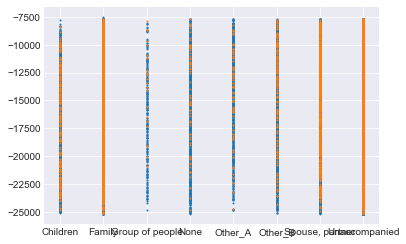

In [12]:
plt.scatter(n.NAME_TYPE_SUITE, n.DAYS_BIRTH, s=1)
plt.scatter(p.NAME_TYPE_SUITE, p.DAYS_BIRTH, s=1)

In [7]:
train.NAME_TYPE_SUITE

0           Unaccompanied
1                  Family
2           Unaccompanied
3           Unaccompanied
4           Unaccompanied
5         Spouse, partner
6           Unaccompanied
7           Unaccompanied
8                Children
9           Unaccompanied
10          Unaccompanied
11               Children
12          Unaccompanied
13          Unaccompanied
14          Unaccompanied
15                 Family
16          Unaccompanied
17          Unaccompanied
18                Other_A
19          Unaccompanied
20          Unaccompanied
21          Unaccompanied
22          Unaccompanied
23          Unaccompanied
24          Unaccompanied
25          Unaccompanied
26          Unaccompanied
27                 Family
28          Unaccompanied
29          Unaccompanied
               ...       
307481             Family
307482      Unaccompanied
307483      Unaccompanied
307484      Unaccompanied
307485             Family
307486      Unaccompanied
307487      Unaccompanied
307488      

In [24]:
import os
import sys

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
sys.path.append('../')
from utils import generate_submit, load_dataset, send_line_notification
from category_encoders import TargetEncoder
from config import *
from utils import timer, timestamp


In [40]:
feats = [
    'main_numeric', 'main_category',
]
X_train, y_train, X_test, _ = load_dataset(feats)

In [44]:
buro = pd.read_feather('../input/bureau.ftr')

In [45]:
buro

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.000,0.000,0.000,0.0,Consumer credit,-155,0.000
1,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.000,0.000,0.000,0.0,Consumer credit,-155,0.000
2,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.000,0.000,0.000,0.0,Consumer credit,-155,0.000
3,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.000,0.000,0.000,0.0,Consumer credit,-155,0.000
4,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.000,113166.000,0.000,0.0,Consumer credit,-6,4630.500
5,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.000,110281.500,NaN,0.0,Consumer credit,-10,9364.500
6,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.000,373239.000,0.000,0.0,Consumer credit,-16,10822.500
7,100002,6158906,Closed,currency 1,-1437,0,-1072.0,-1185.0,0.000,0,135000.000,0.000,0.000,0.0,Consumer credit,-1185,0.000
8,100002,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.000,NaN,NaN,0.0,Credit card,-1038,0.000
9,100002,6158907,Closed,currency 1,-1121,0,-911.0,-911.0,3321.000,0,19071.000,NaN,NaN,0.0,Consumer credit,-906,0.000


In [41]:
X_train[sorted(X_train.columns)].head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,...,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,main_NAME_CONTRACT_TYPE,main_NAME_EDUCATION_TYPE,main_NAME_FAMILY_STATUS,main_NAME_HOUSING_TYPE,main_NAME_INCOME_TYPE,main_NAME_TYPE_SUITE,main_OCCUPATION_TYPE,main_ORGANIZATION_TYPE
0,10.114619,12.915581,12.768544,12.218500,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0.0,1.0,0.0,0.0143,0.0144,0.0144,-9461.0,-637.0,-2120.0,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1.0,0.0,...,0.0377,0.0,0.0,0.0202,0.0205,0.022,0.0190,0.0193,0.0198,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,NaN,0.018801,2.0,2.0,0.0,0.0,0.0,0.0,0.0149,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3
1,10.482892,14.072865,13.937287,12.506181,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0.0,2.0,1.0,0.0605,0.0608,0.0497,-16765.0,-1188.0,-291.0,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1.0,0.0,...,0.0128,0.0,0.0,0.0773,0.0787,0.079,0.0549,0.0558,0.0554,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,NaN,0.003541,1.0,1.0,0.0,0.0,0.0,0.0,0.0714,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,Cash loans,Higher education,Married,House / apartment,State servant,Family,Core staff,School
2,8.817446,11.813037,11.813037,11.119898,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,-19046.0,-225.0,-2531.0,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555912,0.729567,1.0,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,0.010032,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Government
3,10.298481,12.652947,12.601491,11.813037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN,NaN,-19005.0,-3039.0,-2437.0,-617.0,-9833.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,NaN,1.0,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,0.008019,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3
4,9.992711,13.148033,13.148033,11.707678,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,-19932.0,-3038.0,-3458.0,-1106.0,-4311.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.322738,NaN,1.0,0.0,...,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.028663,2.0,2.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [43]:
(X_test.CNT_FAM_MEMBERS - X_test.CNT_CHILDREN).value_counts()

2.0    36544
1.0    12200
dtype: int64

In [21]:
def hist_by_target(col=None, series=None):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    if col is not None:
        (train.loc[train.TARGET==0, col]).hist(bins=100, color='b', alpha=.5, ax=ax1)
        (train.loc[train.TARGET==1, col]).hist(bins=100, color='r', alpha=.5, ax=ax2)
    if series is not None:
        (series[train.TARGET==0]).hist(bins=100, color='b', alpha=.5, ax=ax1)
        (series[train.TARGET==1]).hist(bins=100, color='r', alpha=.5, ax=ax2)
    plt.title(col)
    plt.show()

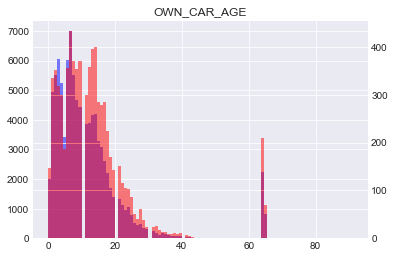

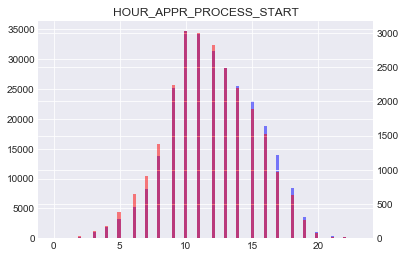

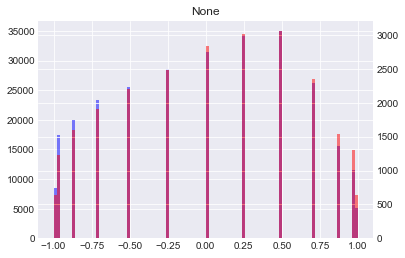

In [22]:
hist_by_target('OWN_CAR_AGE')
hist_by_target('HOUR_APPR_PROCESS_START')
hist_by_target(series=np.sin(train['HOUR_APPR_PROCESS_START']/12*np.pi))

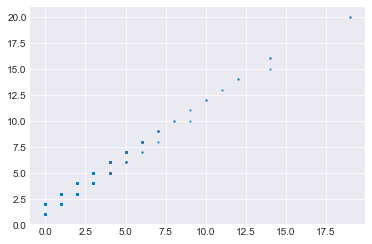

In [33]:
plt.scatter(X_train.CNT_CHILDREN, X_train.CNT_FAM_MEMBERS, s=1)

In [17]:
np.sin(train['HOUR_APPR_PROCESS_START']/12*np.pi)

0         5.000000e-01
1         2.588190e-01
2         7.071068e-01
3        -9.659258e-01
4         2.588190e-01
5        -8.660254e-01
6        -8.660254e-01
7        -8.660254e-01
8        -5.000000e-01
9         8.660254e-01
10       -7.071068e-01
11        9.659258e-01
12        5.000000e-01
13       -2.588190e-01
14        7.071068e-01
15        1.000000e+00
16        1.224647e-16
17        5.000000e-01
18       -2.588190e-01
19        1.224647e-16
20       -2.588190e-01
21        7.071068e-01
22        1.000000e+00
23        1.224647e-16
24       -5.000000e-01
25        8.660254e-01
26        7.071068e-01
27        5.000000e-01
28        2.588190e-01
29       -8.660254e-01
              ...     
307481   -7.071068e-01
307482   -7.071068e-01
307483    1.224647e-16
307484   -2.588190e-01
307485   -1.000000e+00
307486   -9.659258e-01
307487    5.000000e-01
307488   -1.000000e+00
307489    9.659258e-01
307490    1.224647e-16
307491    5.000000e-01
307492    5.000000e-01
307493    1

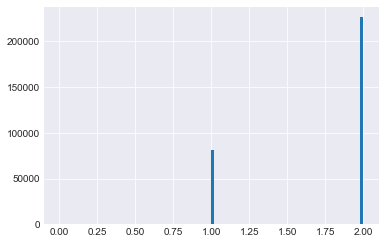

In [35]:
(X_train.CNT_FAM_MEMBERS - X_train.CNT_CHILDREN).fillna(0).hist(bins=100)

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [148]:
train.filter(regex='AMT_REQ_').cumsum(axis=1).drop('AMT_REQ_CREDIT_BUREAU_HOUR')

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,2.0
6,0.0,0.0,0.0,1.0,2.0,4.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,NaN,NaN,NaN,NaN,NaN,NaN


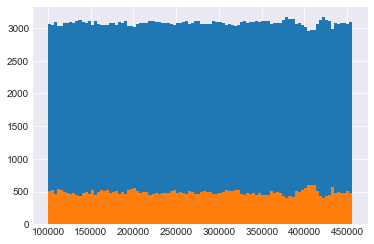

In [8]:
train.SK_ID_CURR.hist(bins=100)
test.SK_ID_CURR.hist(bins=100)

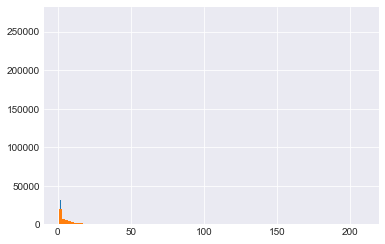

In [9]:
train.SK_ID_CURR.diff().hist(bins=100)
test.SK_ID_CURR.diff().hist(bins=100)

In [10]:
pos = pd.read_feather('../input/POS_CASH_balance.ftr').sort_values(['SK_ID_CURR', 'MONTHS_BALANCE']).reset_index(drop=True)

In [20]:
pos.query('SK_DPD_DEF > 0')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1,1851984,100001,-95,4.0,1.0,Active,7,7
324,1430602,100011,-75,12.0,4.0,Active,8,8
325,1430602,100011,-74,12.0,3.0,Active,9,9
326,1430602,100011,-73,12.0,2.0,Active,9,9
497,1027737,100015,-71,10.0,2.0,Active,13,13
848,2037234,100033,-20,12.0,3.0,Active,1,1
850,2037234,100033,-18,12.0,1.0,Active,2,2
1198,1137041,100044,-68,18.0,0.0,Active,11,11
1246,1288446,100045,-87,6.0,1.0,Active,1,1
1663,1950847,100061,-42,12.0,2.0,Active,2,2


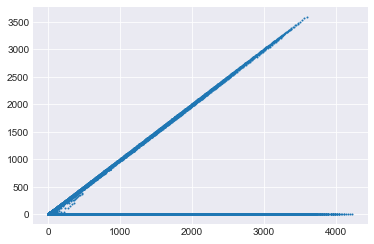

In [21]:
pos_sample = pos.query("SK_DPD > 0")
plt.scatter(pos_sample.SK_DPD, pos_sample.SK_DPD_DEF, s=1)

In [40]:
pos.AMT_INST_MIN_REGULARITY

AttributeError: 'DataFrame' object has no attribute 'AMT_INST_MIN_REGULARITY'

In [41]:
credit = pd.read_feather('../input/credit_card_balance.ftr').sort_values(['SK_ID_CURR', 'MONTHS_BALANCE']).reset_index(drop=True)

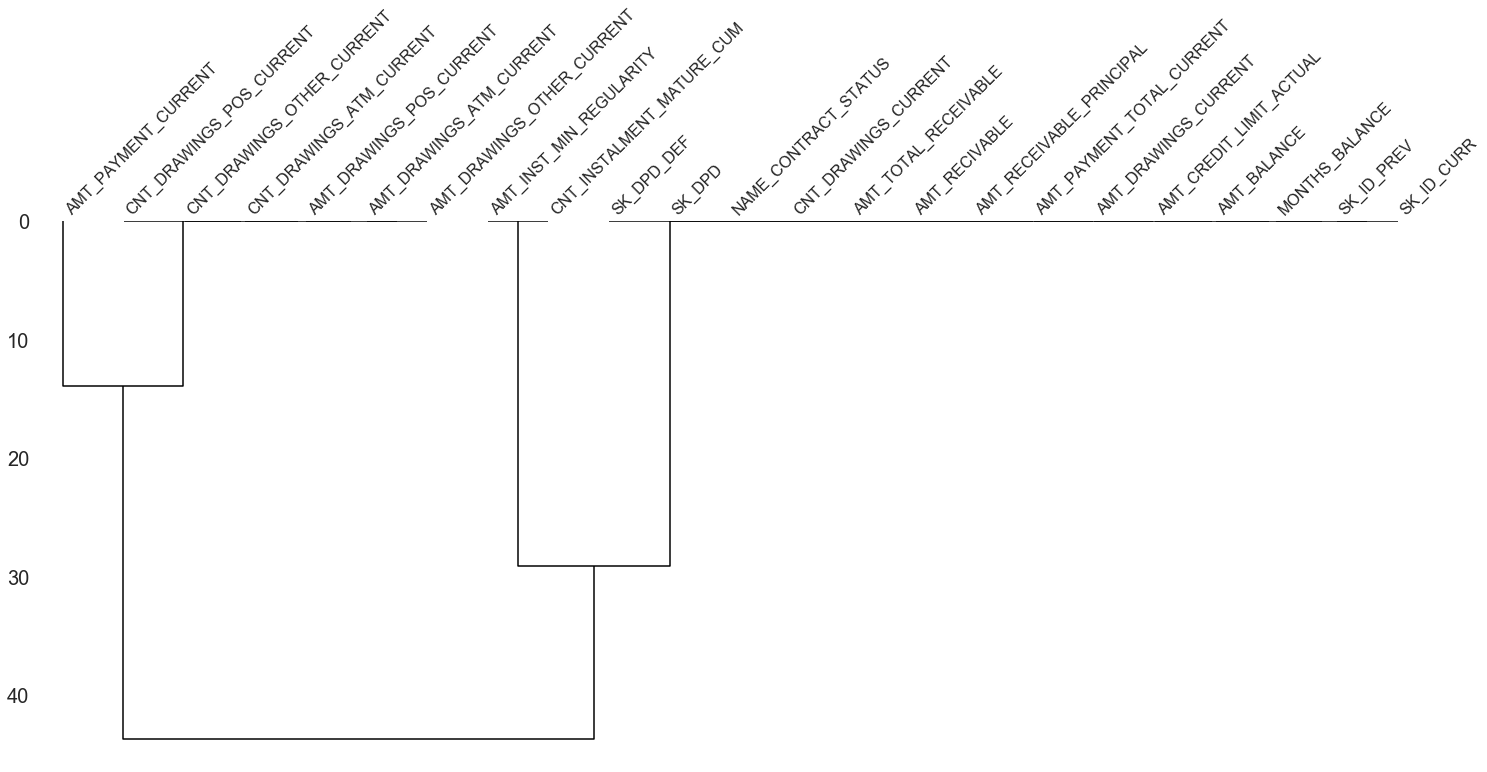

In [44]:
msno.dendrogram(credit.sample(10000))

In [52]:
df = pd.DataFrame({'NAME_CONTRACT_TYPE': train.NAME_CONTRACT_TYPE, 'TARGET': train.TARGET})
piv = df.groupby('NAME_CONTRACT_TYPE').TARGET.value_counts().unstack().fillna(0).astype(int)

In [67]:
mapping = ((piv + 0.5) / piv.sum(axis=0)).apply(lambda x: np.log(x.iloc[0]/x.iloc[1]), axis=1)

In [71]:
df['new'] = np.nan

In [68]:
mapping

NAME_CONTRACT_TYPE
Cash loans        -0.036255
Revolving loans    0.415250
dtype: float64

In [95]:
train.select_dtypes(['object'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,None,None,None,None
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,None,None,None,None
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,None,None,None,None
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,None,None,None,None
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,None,None,None,None
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,None,None,None,None
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,None,WEDNESDAY,XNA,None,None,None,None
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,None,None,None,None


In [143]:
class WeightOfEvidence:
    def __init__(self, cols=None, unknown=-1, prefix=None, suffix=None):
        self.unknown = unknown
        self.prefix = prefix + '_' if prefix else ''
        self.suffix = '_' + suffix if suffix else ''
        self.cols = cols
        self.maps = {}
    
    def fit(self, X, y):
        if self.cols is None:
            self.cols = X.select_dtypes(['object']).columns.tolist()
        for f in tqdm(self.cols):
            df = pd.DataFrame({f: X[f].fillna('NaN'), 'TARGET': y})
            piv = df.groupby(f).TARGET.value_counts().unstack().fillna(0).astype(int)
            self.maps[f] = ((piv + 0.5) / piv.sum(axis=0)).apply(lambda x: np.log(x.iloc[0]/x.iloc[1]), axis=1)
    
    def transform(self, X):
        r = pd.DataFrame()
        for f in tqdm(self.cols):
            ref = X[f].fillna('NaN')
            r[f] = ref.replace(self.maps[f])
            r[r[f]==ref] = self.unknown
        r.columns = self.prefix + r.columns + self.suffix
        return r
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [144]:
woe = WeightOfEvidence(suffix='woe')

In [145]:
train_woe = woe.fit_transform(train, train.TARGET)
test_woe = woe.transform(test)

100%|██████████| 16/16 [00:02<00:00,  7.01it/s]


In [146]:
train_woe

,NAME_CONTRACT_TYPE_woe,CODE_GENDER_woe,FLAG_OWN_CAR_woe,FLAG_OWN_REALTY_woe,NAME_TYPE_SUITE_woe,NAME_INCOME_TYPE_woe,NAME_EDUCATION_TYPE_woe,NAME_FAMILY_STATUS_woe,NAME_HOUSING_TYPE_woe,OCCUPATION_TYPE_woe,WEEKDAY_APPR_PROCESS_START_woe,ORGANIZATION_TYPE_woe,FONDKAPREMONT_MODE_woe,HOUSETYPE_MODE_woe,WALLSMATERIAL_MODE_woe,EMERGENCYSTATE_MODE_woe
0,-0.036255,-0.250973,-0.056268,0.015067,-0.014776,-0.188705,-0.111517,-0.213806,0.037926,-0.298052,-0.011837,-0.154969,0.157469,0.162889,0.093397,0.159566
1,-0.036255,0.154274,-0.056268,-0.033548,0.080449,0.362974,0.439476,0.071191,0.037926,0.266125,0.043197,0.333374,0.157469,0.162889,0.149698,0.159566
2,0.415250,-0.250973,0.117293,0.015067,-0.014776,-0.188705,-0.111517,-0.213806,0.037926,-0.298052,0.043197,0.156938,-0.071422,-0.137204,-0.134427,-0.150313
3,-0.036255,0.154274,-0.056268,0.015067,-0.014776,-0.188705,-0.111517,-0.229239,0.037926,-0.298052,-0.011837,-0.154969,-0.071422,-0.137204,-0.134427,-0.150313
4,-0.036255,-0.250973,-0.056268,0.015067,-0.014776,-0.188705,-0.111517,-0.213806,0.037926,0.266125,-0.003794,0.251024,-0.071422,-0.137204,-0.134427,-0.150313
5,-0.036255,-0.250973,-0.056268,0.015067,0.026927,0.362974,-0.111517,0.071191,0.037926,-0.298052,-0.011837,0.059096,-0.071422,-0.137204,-0.134427,-0.150313
6,-0.036255,0.154274,0.117293,0.015067,-0.014776,0.082006,0.439476,0.071191,0.037926,0.547261,0.019184,-0.154969,-0.071422,-0.137204,-0.134427,-0.150313
7,-0.036255,-0.250973,0.117293,0.015067,-0.014776,0.362974,0.439476,0.071191,0.037926,0.281369,0.043197,0.059096,-0.071422,-0.137204,-0.134427,-0.150313
8,-0.036255,0.154274,-0.056268,0.015067,0.095807,0.433287,-0.111517,0.071191,0.037926,0.231453,-0.011837,0.430685,-0.071422,-0.137204,-0.134427,-0.150313
9,0.415250,-0.250973,-0.056268,0.015067,-0.014776,-0.188705,-0.111517,-0.213806,0.037926,-0.298052,-0.003794,0.204883,-0.071422,-0.137204,-0.134427,-0.150313


In [88]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [93]:
train_woe.CODE_GENDER_woe.value_counts()

 0.154274    202448
-0.250973    105059
-0.235261         4
Name: CODE_GENDER_woe, dtype: int64

In [77]:
train.select_dtypes(['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
class WeightOfEvidence:
    def __init__(self, cols=None):
        self.cols = cols
        self.maping = None
    
    def fit(X, y):
        

In [ ]:
adef weight_of_evidence(X_train, )

In [43]:
credit

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1489396,100006,-6,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1,1489396,100006,-5,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
2,1489396,100006,-4,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3,1489396,100006,-3,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
4,1489396,100006,-2,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
5,1489396,100006,-1,0.000,270000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
6,1843384,100011,-75,189000.000,180000,180000.0,180000.0,0.0,0.0,NaN,0.0,0.000,180000.000,189000.000,189000.000,4.0,4,0.0,0.0,NaN,Active,0,0
7,1843384,100011,-74,184568.850,180000,0.0,0.0,0.0,0.0,9000.000,9000.0,9000.000,180000.000,184568.850,184568.850,0.0,0,0.0,0.0,1.0,Active,0,0
8,1843384,100011,-73,181044.540,180000,0.0,0.0,0.0,0.0,9000.000,9000.0,9000.000,175568.850,181044.540,181044.540,0.0,0,0.0,0.0,2.0,Active,0,0
9,1843384,100011,-72,177544.350,180000,0.0,0.0,0.0,0.0,9000.000,9000.0,9000.000,172044.540,177544.350,177544.350,0.0,0,0.0,0.0,3.0,Active,0,0


In [42]:
credit.AMT_INST_MIN_REGULARITY

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
5             0.000
6               NaN
7          9000.000
8          9000.000
9          9000.000
10         9000.000
11         9000.000
12         9000.000
13         9000.000
14         9000.000
15         9000.000
16         9000.000
17         9000.000
18         9000.000
19         9000.000
20         9000.000
21         9000.000
22         9000.000
23         9000.000
24         9000.000
25         9000.000
26         9000.000
27         9000.000
28         9000.000
29         9000.000
             ...   
3840282       0.000
3840283       0.000
3840284       0.000
3840285       0.000
3840286       0.000
3840287       0.000
3840288       0.000
3840289       0.000
3840290       0.000
3840291       0.000
3840292       0.000
3840293       0.000
3840294       0.000
3840295       0.000
3840296       0.000
3840297       0.000
3840298       0.000
3840299       0.000
3840300       0.000


In [22]:
train.query("0 <= HOUR_APPR_PROCESS_START <= 5")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
53,100061,0,Cash loans,F,N,Y,2,225000.0,314055.0,16164.0,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.006629,-10473,-1392,-2025.0,-1240,NaN,1,1,0,1,0,0,Core staff,4.0,2,2,THURSDAY,3,0,0,0,1,1,0,Self-employed,0.189596,0.702979,0.701696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-570.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
137,100159,0,Cash loans,F,N,Y,0,225000.0,1515415.5,41800.5,1354500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.003818,-14645,-4027,-7154.0,-1969,NaN,1,1,1,1,1,0,Sales staff,2.0,2,2,FRIDAY,3,0,0,0,0,0,0,Trade: type 7,0.545859,0.571250,0.789880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,2.0,0.0,2.0,0.0,-700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
159,100188,0,Cash loans,F,N,N,1,225000.0,1325475.0,56290.5,1125000.0,Unaccompanied,Working,Higher education,Married,Office apartment,0.002506,-15323,-5785,-5368.0,-3602,NaN,1,1,0,1,0,0,Core staff,3.0,2,2,FRIDAY,4,0,0,0,0,1,1,School,0.728092,0.702463,0.546023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,0.0,0.0,0.0,0.0,-573.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
246,100286,1,Cash loans,M,Y,Y,1,121500.0,263686.5,17298.0,238500.0,"Spouse, partner",Working,Secondary / secondary special,Marrie

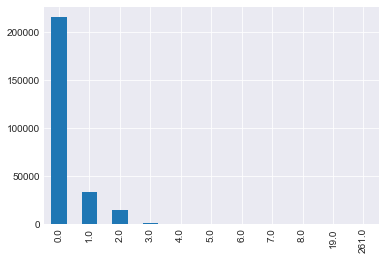

In [29]:
train.AMT_REQ_CREDIT_BUREAU_QRT.value_counts().plot.bar()

In [31]:
bureau = pd.read_feather('../input/bureau.ftr').sort_values(['SK_ID_CURR', 'DAYS_CREDIT']).reset_index(drop=True)

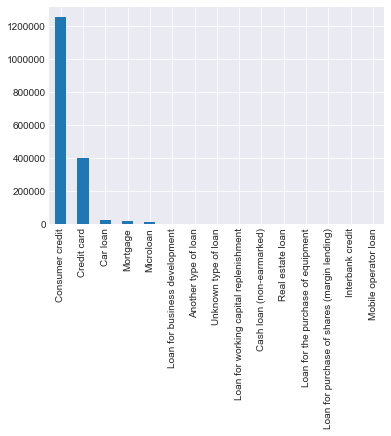

In [39]:
bureau.CREDIT_TYPE.value_counts().plot.bar()

In [37]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


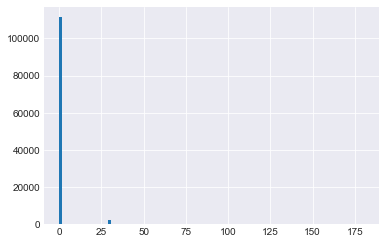

In [17]:
(pos_sample.SK_DPD - pos_sample.SK_DPD_DEF).hist(bins=100)

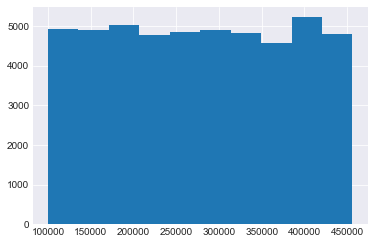

In [6]:
test.SK_ID_CURR.hist()

In [9]:
piv = pd.pivot_table(train, index='NAME_CONTRACT_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')

In [11]:
piv

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,255011,23221
Revolving loans,27675,1604


In [16]:
piv.loc['__SUM__', :] = piv.sum(axis=0)
piv.loc[:, '__SUM__'] = piv.sum(axis=1)
piv

TARGET,0,1,__SUM__
NAME_CONTRACT_TYPE,,,
Cash loans,255011.0,23221.0,556464.0
Revolving loans,27675.0,1604.0,58558.0
__SUM__,565372.0,49650.0,1230044.0


In [5]:
def woe(df, f, target):
    
    
woe(train, 'NAME_CONTRACT_TYPE', 'TARGET')

In [ ]:
def WoE(df, test, col, target_col):
    pos_outcom = df[target_col].sum()
    neg_outcom = len(df) - pos_outcom
    col_unique = df[col].unique()
    res = pd.DataFrame()
    res[col] = col_unique
    res['po'] = 0
    res['ne'] = 0
    a = df.groupby([col, target_col]).count()['HP_pok1']
    for i in tqdm(col_unique):
        try:
            res.loc[res[col] == i, 'po'] = a[i][1]
        except:
            res.loc[res[col] == i, 'po'] = 0
        try:
            res.loc[res[col] == i, 'ne'] = a[i][0]
        except:
            res.loc[res[col] == i, 'ne'] = 0
    res['woe_po'] = (res['po']+0.5) / pos_outcom
    res['woe_ne'] = (res['ne']+0.5) / neg_outcom
    res_col = col + 'woe'
    res[res_col] = np.log(res['woe_po']/res['woe_ne'])
    res = pd.merge(df, res[[col, res_col]], on=col)
    res2 = pd.merge(test, res[[col, res_col]], on=col, how='left')
    return res, res2

In [4]:
train.iloc[:, 1:] = train.iloc[:, 1:].replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan, 365243: np.nan})

# https://www.kaggle.com/c/home-credit-default-risk/discussion/57248
train.replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan, 365243: np.nan}, inplace=True)
test.replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan, 365243: np.nan}, inplace=True)

train.SK_ID_CURR = train.SK_ID_CURR.fillna(365243).astype(int)
test.SK_ID_CURR = test.SK_ID_CURR.fillna(365243).astype(int)

In [6]:
pos = train.TARGET==1
neg = train.TARGET==0

## DAYS

In [5]:
train['before_employ'] = train.DAYS_EMPLOYED - train.DAYS_BIRTH
test['before_employ'] = test.DAYS_EMPLOYED - test.DAYS_BIRTH

train['before_register'] = train.DAYS_REGISTRATION - train.DAYS_EMPLOYED
test['before_register'] = test.DAYS_REGISTRATION - test.DAYS_EMPLOYED

train['before_id_publish'] = train.DAYS_ID_PUBLISH - train.DAYS_REGISTRATION
test['before_id_publish'] = test.DAYS_ID_PUBLISH - test.DAYS_REGISTRATION

In [6]:
neg_pos_ratio = neg.sum()/pos.sum()

In [7]:
len(train)/len(test)

6.308694403413753

In [8]:
def show_hists(cols, func=None):
    for f in cols:
        fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
        if func:
            func(train.loc[neg, f]).hist(bins=300, alpha=.8, ax=axes[0], label='negative')
            func(train.loc[pos, f]).hist(bins=30, alpha=.8, ax=axes[0], label='positive')
            func(train[f]).hist(bins=180, alpha=.8, ax=axes[1], label='train')
            func(test[f]).hist(bins=30, alpha=.8, ax=axes[1], label='test')
        else:
            train.loc[neg, f].hist(bins=300, alpha=.8, ax=axes[0], label='negative')
            train.loc[pos, f].hist(bins=30, alpha=.8, ax=axes[0], label='positive')
            train[f].hist(bins=180, alpha=.8, ax=axes[1], label='train')
            test[f].hist(bins=50, alpha=.8, ax=axes[1], label='test')

        [(ax.legend(), ax.set_title(f)) for ax in axes]
        plt.show()

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'before_employ', 'before_register',
       'before_id_publish'],
      dtype='object')


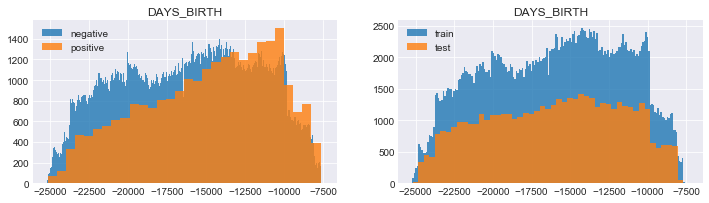

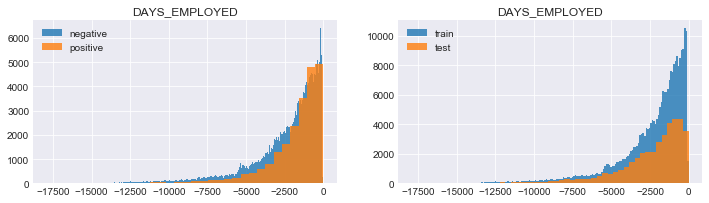

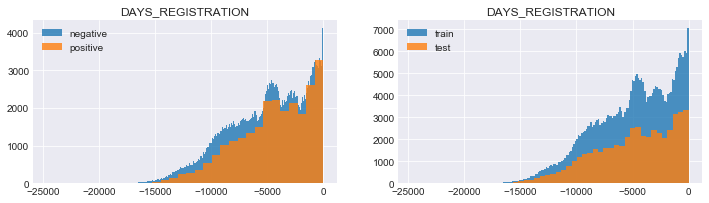

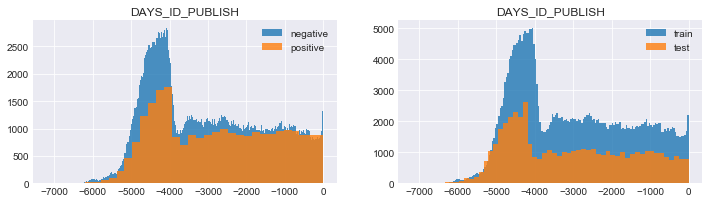

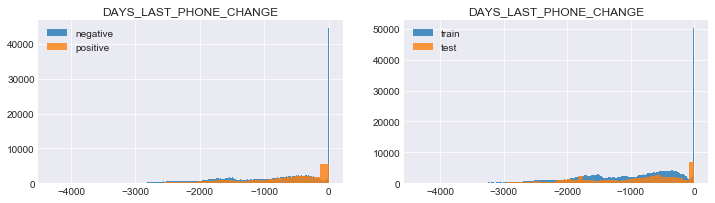

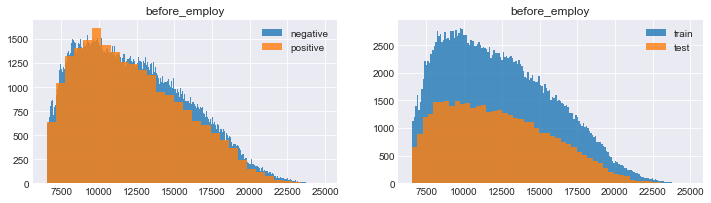

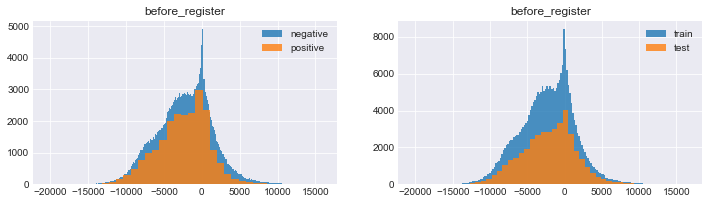

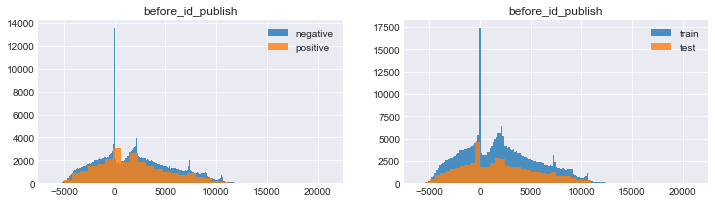

In [9]:
day_cols = train.columns[train.columns.str.startswith('DAYS_') | train.columns.str.startswith('before_')]
print(day_cols)
show_hists(day_cols)

## AMT

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


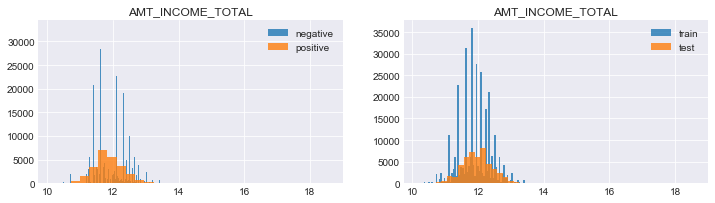

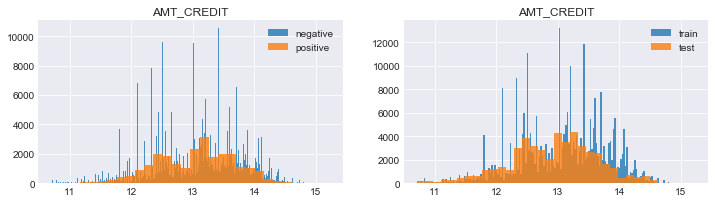

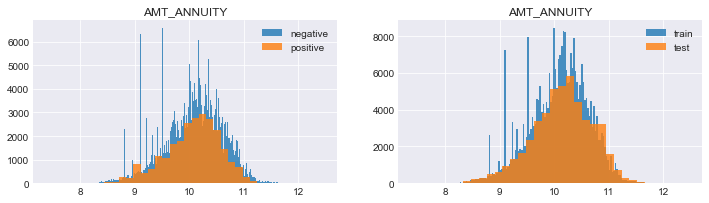

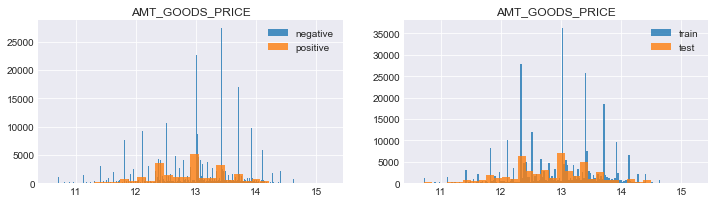

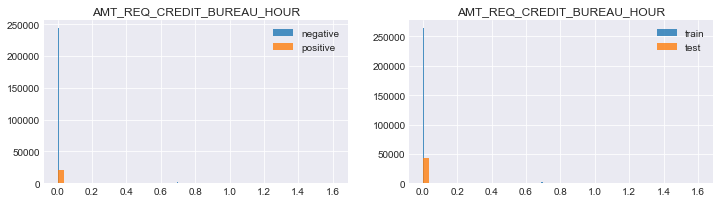

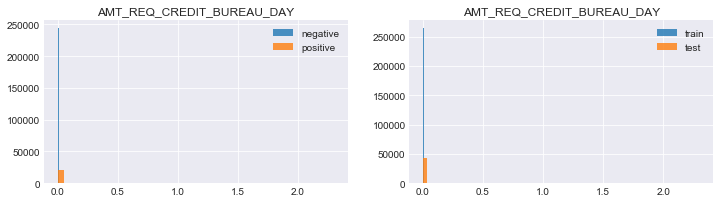

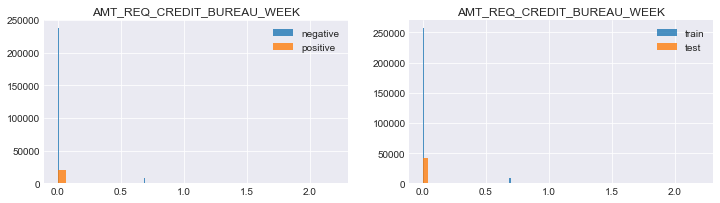

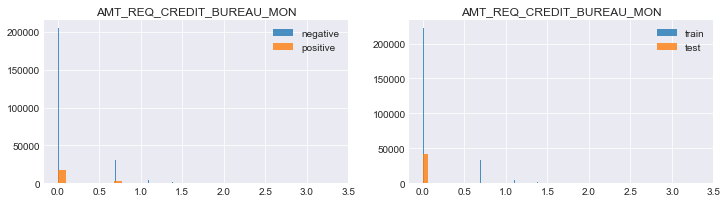

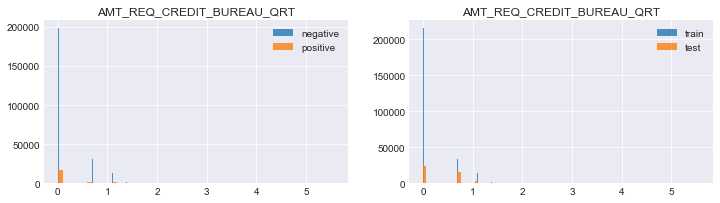

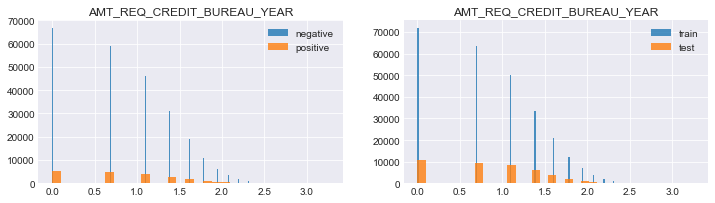

In [10]:
amount_cols = train.columns[train.columns.str.startswith('AMT_')]
print(amount_cols)
show_hists(amount_cols, np.log1p)

In [11]:
train['credit_income_ratio'] = train.AMT_CREDIT / train.AMT_INCOME_TOTAL
train['goods_income_ratio'] = train.AMT_CREDIT / train.AMT_INCOME_TOTAL
train['annuity_income_ratio'] = train.AMT_ANNUITY / train.AMT_INCOME_TOTAL
train['goods_credit_ratio'] = train.AMT_GOODS_PRICE / train.AMT_CREDIT
train['n_division'] = train.AMT_CREDIT / train.AMT_ANNUITY

test['credit_income_ratio'] = test.AMT_CREDIT / test.AMT_INCOME_TOTAL
test['goods_income_ratio'] = test.AMT_CREDIT / test.AMT_INCOME_TOTAL
test['annuity_income_ratio'] = test.AMT_ANNUITY / test.AMT_INCOME_TOTAL
test['goods_credit_ratio'] = test.AMT_GOODS_PRICE / test.AMT_CREDIT
test['n_division'] = test.AMT_CREDIT / test.AMT_ANNUITY

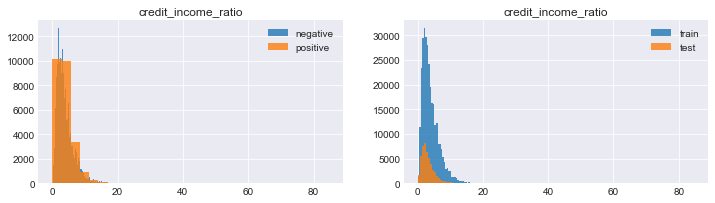

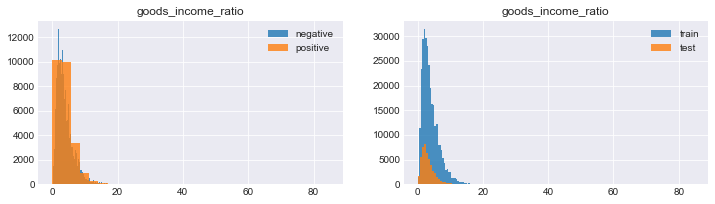

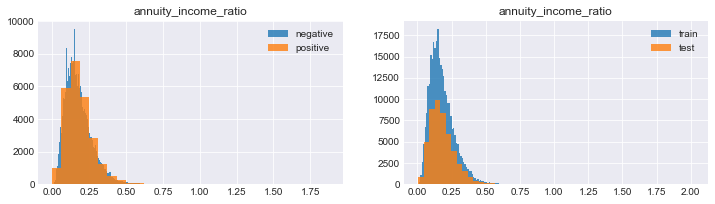

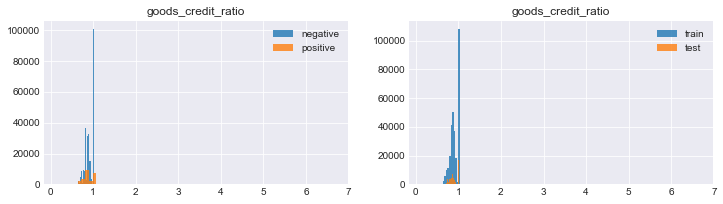

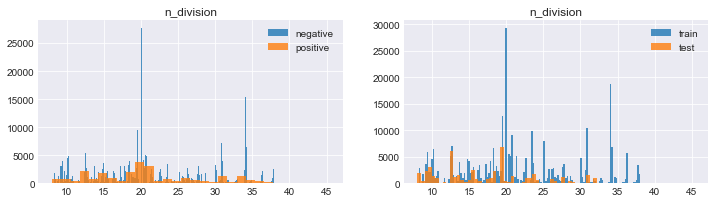

In [12]:
show_hists(['credit_income_ratio', 'goods_income_ratio', 'annuity_income_ratio', 'goods_credit_ratio', 'n_division'])

In [113]:
train_bin = train.filter(regex='(TARGET|CODE_|FLAG_)').fillna(-1).astype(int)
test_bin = test.filter(regex='(TARGET|CODE_|FLAG_)').fillna(-1).astype(int)

ValueError: invalid literal for int() with base 10: 'F'

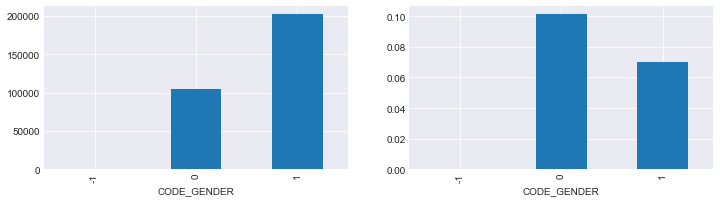

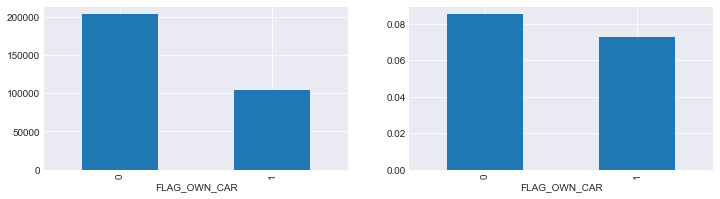

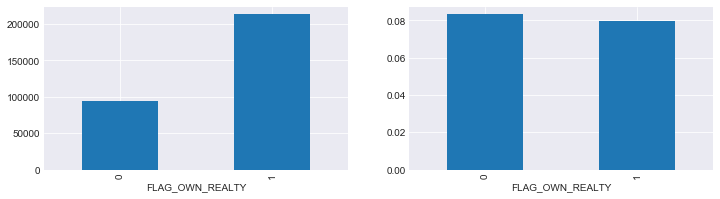

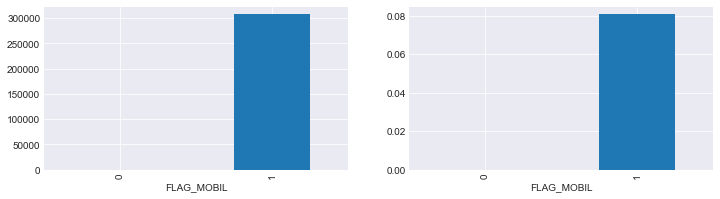

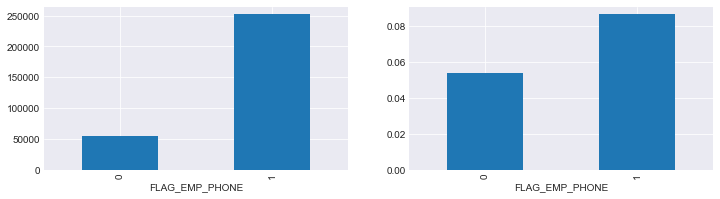

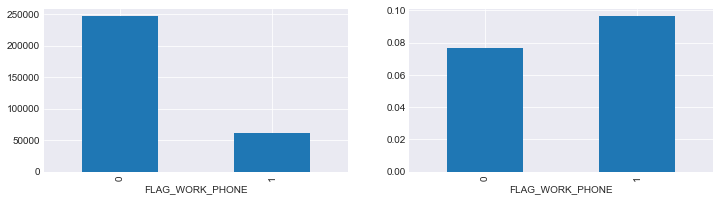

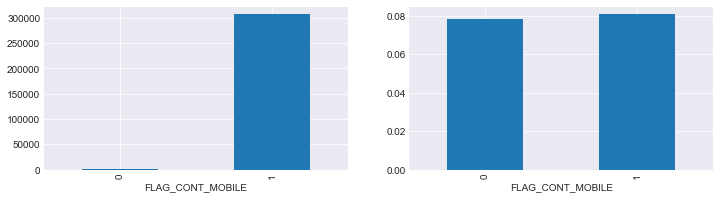

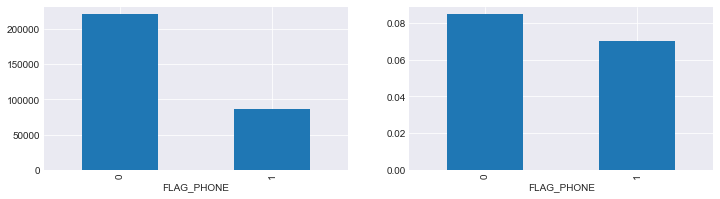

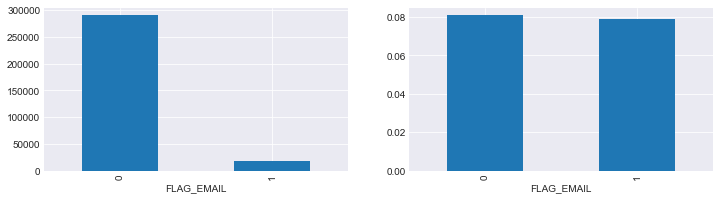

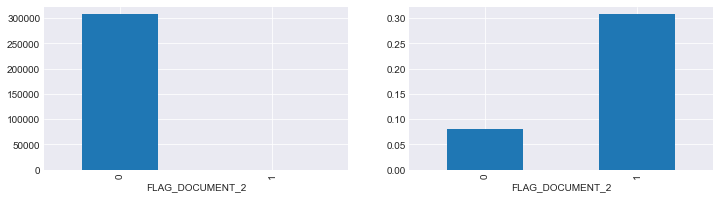

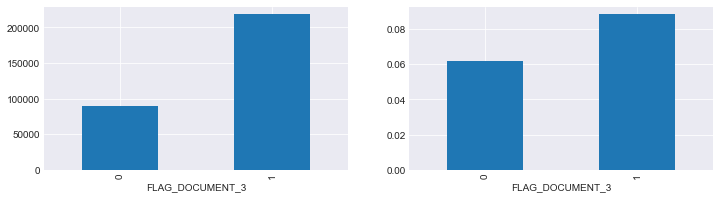

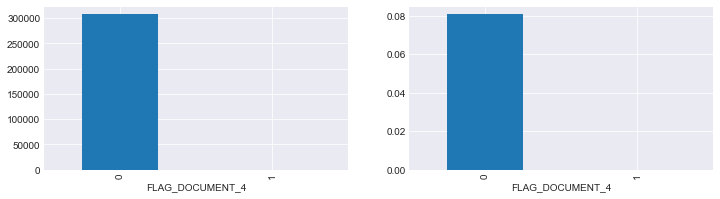

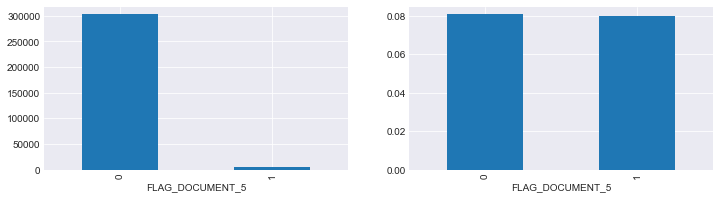

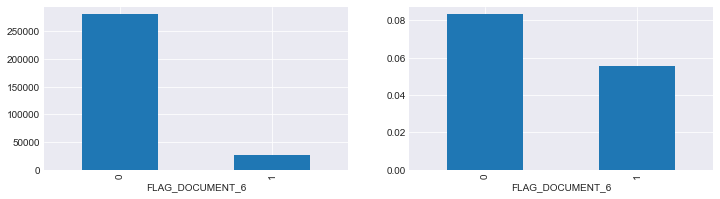

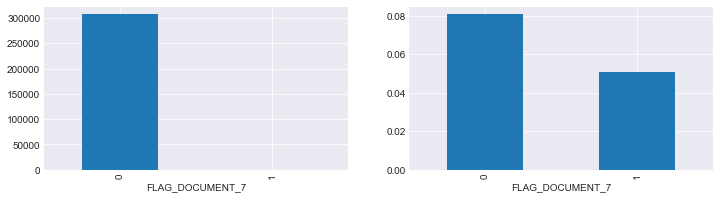

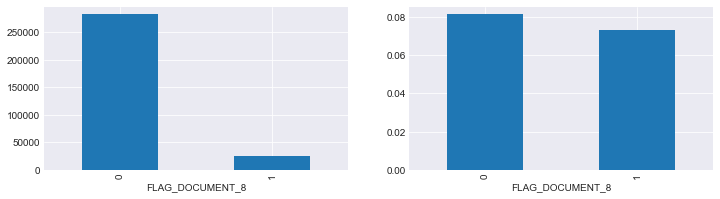

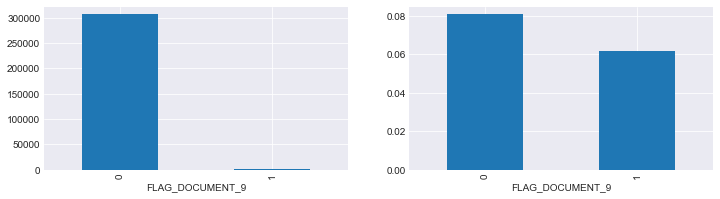

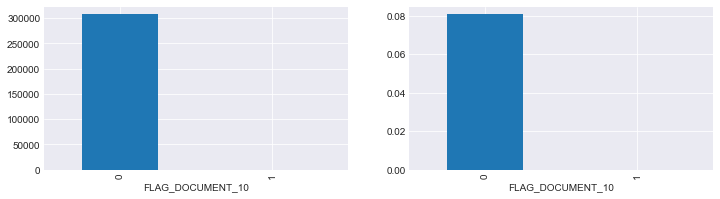

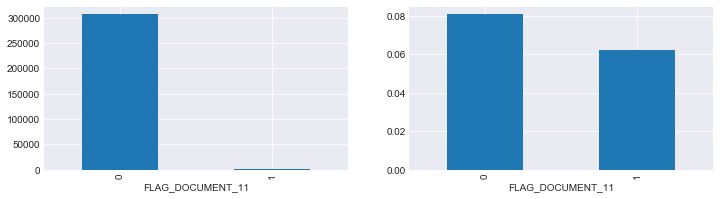

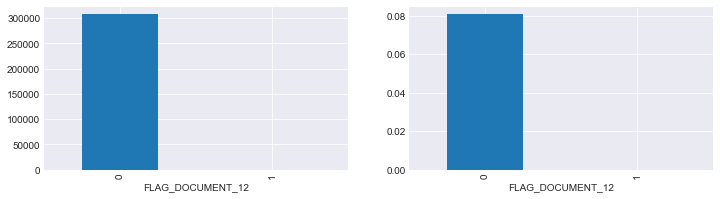

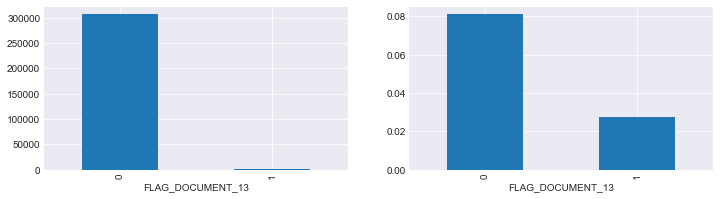

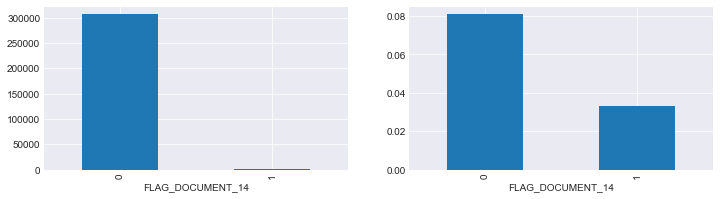

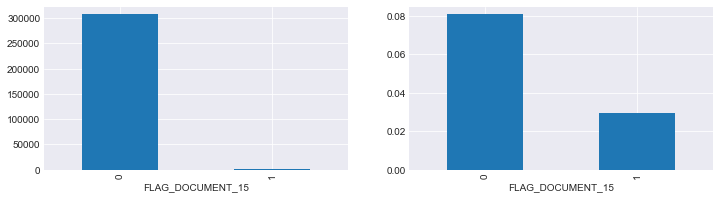

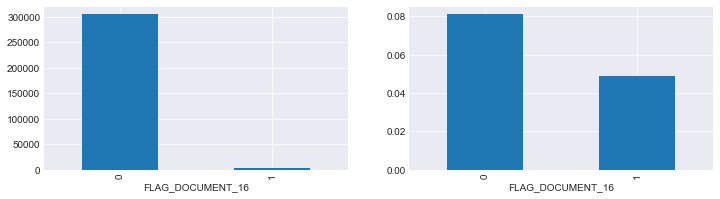

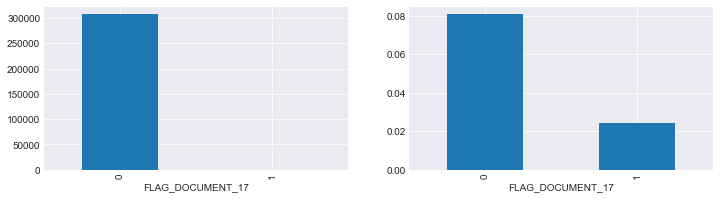

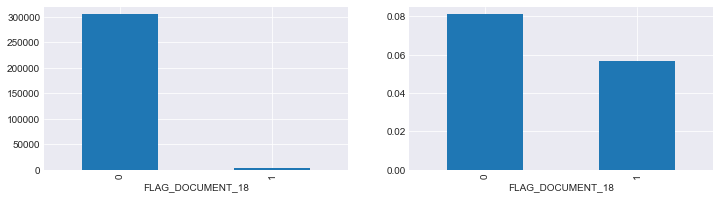

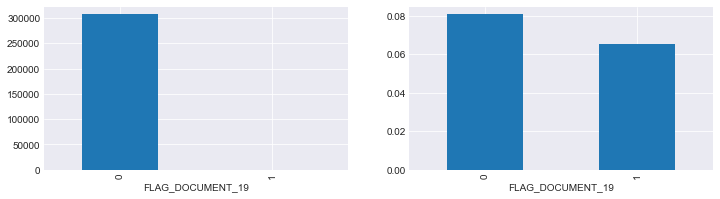

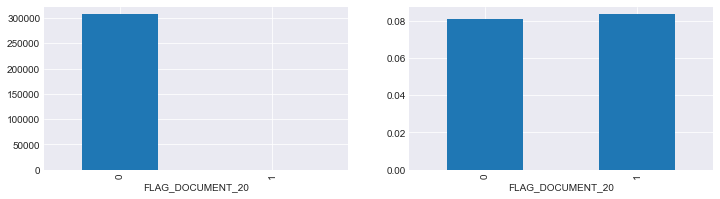

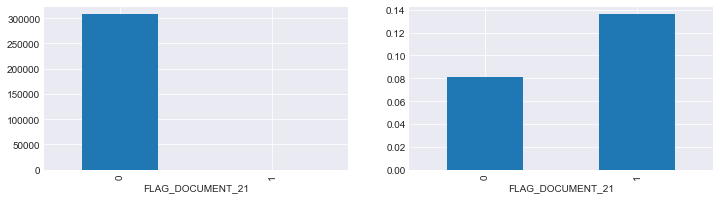

In [30]:
bin_columns = [f for f in train_bin.columns if f != 'TARGET']
for f in bin_columns:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
    train_bin.groupby(f).TARGET.count().plot.bar(ax=axes[0])
    train_bin.groupby(f).TARGET.mean().plot.bar(ax=axes[1])
    plt.show()

In [86]:
def category_summary(cols):
    for f in cols:
        fig, axes = plt.subplots(ncols=2, figsize=(15, 3))
        train.groupby(f).TARGET.count().plot.bar(ax=axes[0])
        train.groupby(f).TARGET.mean().plot.bar(ax=axes[1])
        plt.show()

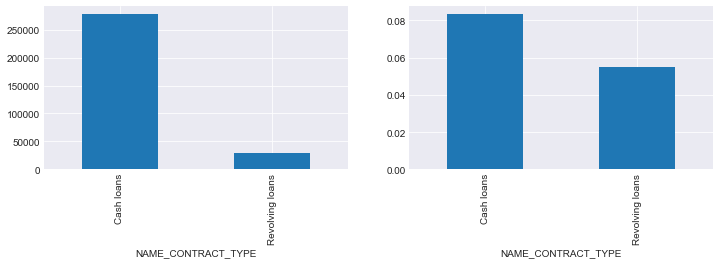

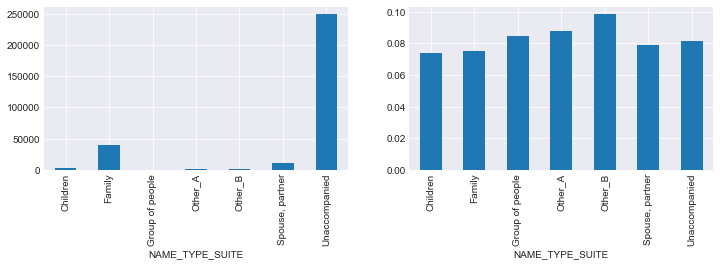

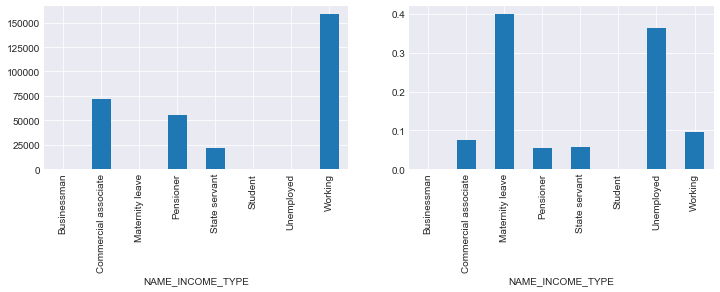

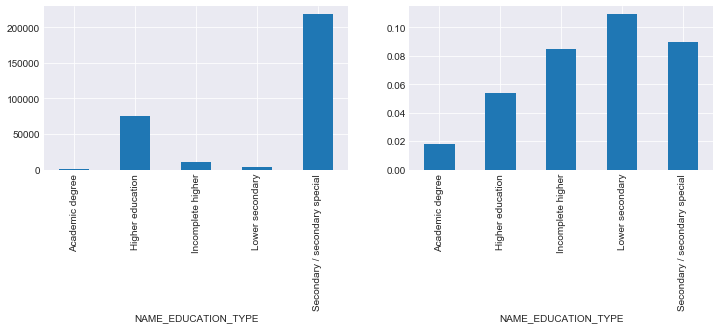

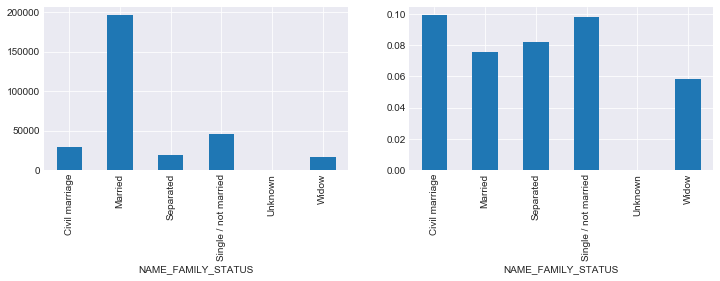

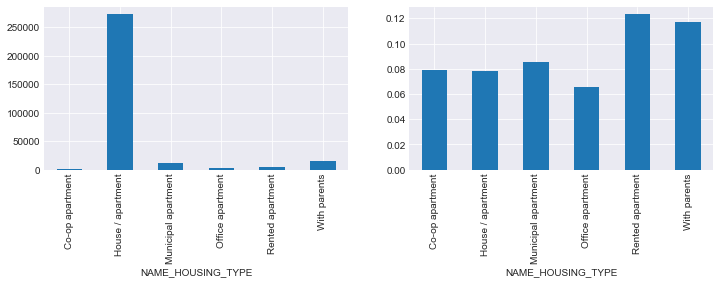

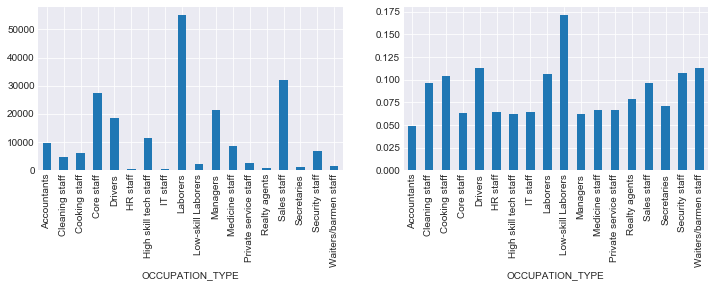

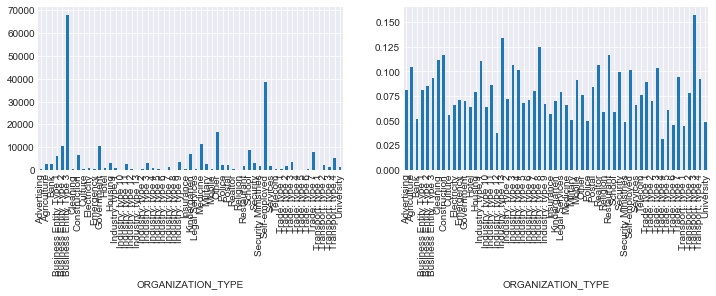

In [67]:
train_name = train.filter(regex='(TARGET|NAME_|_TYPE)')
name_cols = [f for f in train_name.columns if f!='TARGET']
for f in name_cols:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
    train_name.groupby(f).TARGET.count().plot.bar(ax=axes[0])
    train_name.groupby(f).TARGET.mean().plot.bar(ax=axes[1])
    plt.show()

## COUNT

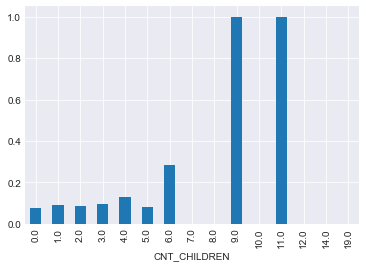

In [59]:
train.groupby('CNT_CHILDREN').TARGET.mean().plot.bar()

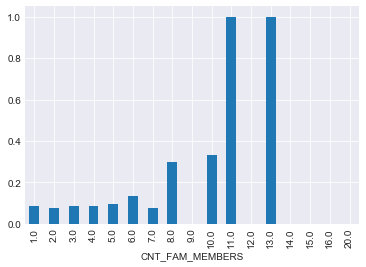

In [60]:
train.groupby('CNT_FAM_MEMBERS').TARGET.mean().plot.bar()

## REGION

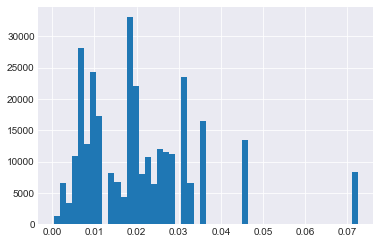

In [81]:
train.REGION_POPULATION_RELATIVE.hist(bins=50)

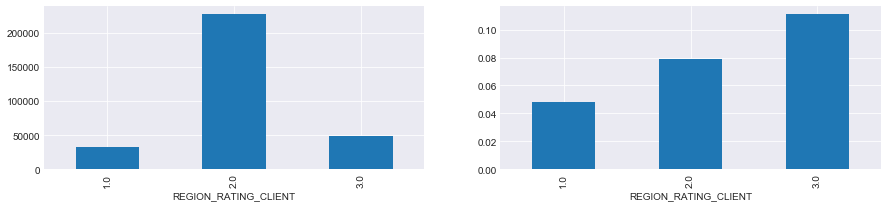

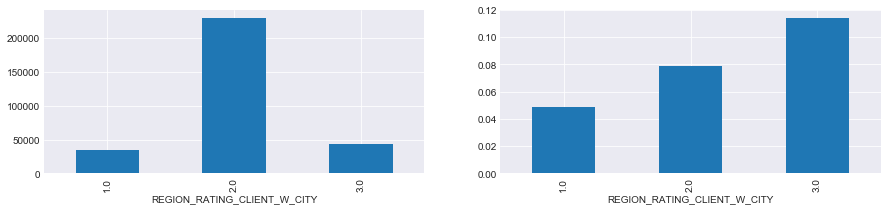

In [88]:
category_summary(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'])

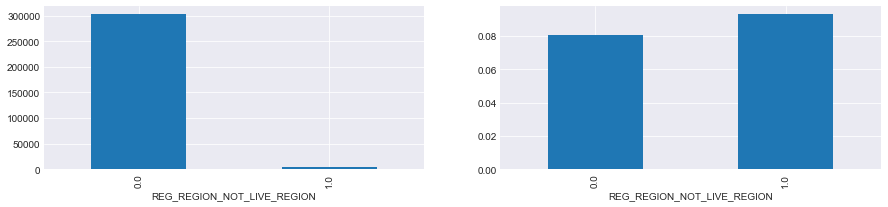

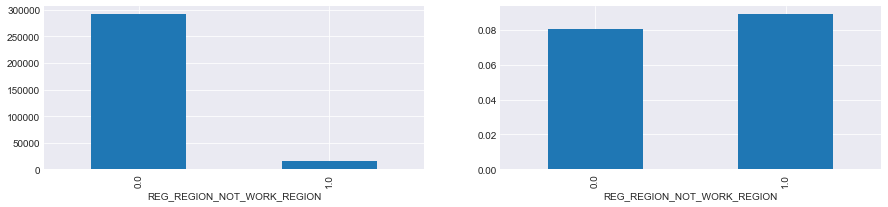

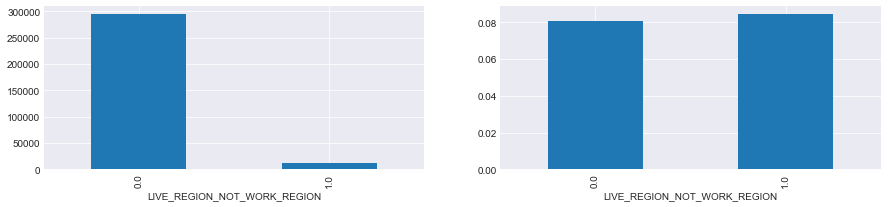

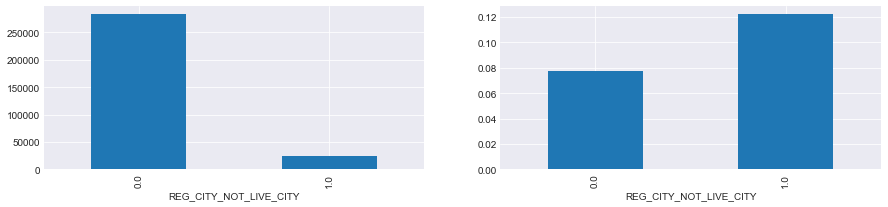

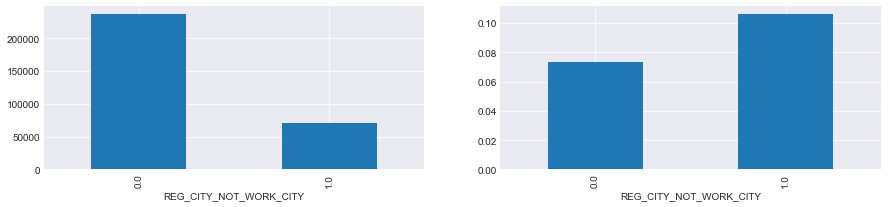

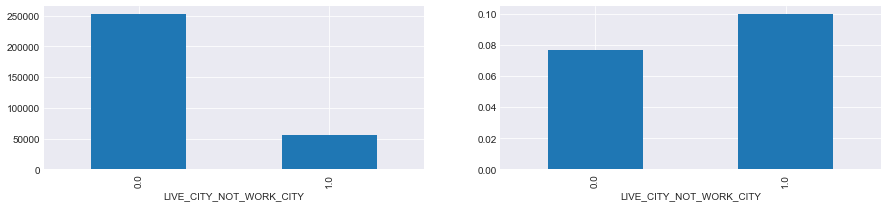

In [96]:
category_summary(train.filter(regex='(_REGION_|_CITY_)').columns)

## EXT_SOURCE

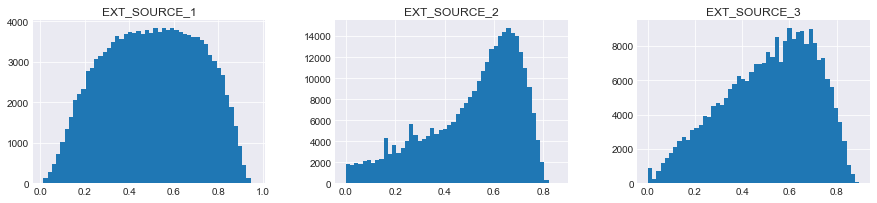

In [102]:
train.filter(regex='EXT_SOURCE').hist(layout=(1, 3), figsize=(15, 3), bins=50)
plt.show()

In [10]:
import itertools
ext_cols = {'ext1': 'EXT_SOURCE_1', 'ext2': 'EXT_SOURCE_2', 'ext3': 'EXT_SOURCE_3'}
for i, j in tqdm(itertools.combinations(ext_cols.keys(), 2)):
    train[f'{i}_plus_{j}'] = train[ext_cols[i]] + train[ext_cols[j]]
    train[f'{i}_minus_{j}'] = train[ext_cols[i]] - train[ext_cols[j]]
    train[f'{i}_times_{j}'] = train[ext_cols[i]] * train[ext_cols[j]]
    train[f'{i}_div_{j}'] = train[ext_cols[i]] / (train[ext_cols[j]] + 0.1)
    test[f'{i}_plus_{j}'] = test[ext_cols[i]] + test[ext_cols[j]]
    test[f'{i}_minus_{j}'] = test[ext_cols[i]] - test[ext_cols[j]]
    test[f'{i}_times_{j}'] = test[ext_cols[i]] * test[ext_cols[j]]
    test[f'{i}_div_{j}'] = test[ext_cols[i]] / (test[ext_cols[j]] + 0.1)

3it [00:00, 16.79it/s]


In [12]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ext1_plus_ext2,ext1_minus_ext2,ext1_times_ext2,ext1_div_ext2,ext1_plus_ext3,ext1_minus_ext3,ext1_times_ext3,ext1_div_ext3,ext2_plus_ext3,ext2_minus_ext3,ext2_times_ext3,ext2_div_ext3
0,100002,1.0,Cash loans,0.0,0.0,1.0,0.0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.345986,-0.179912,0.021834,0.228784,0.222413,-0.056339,0.011573,0.346890,0.402324,0.123573,0.036649,1.098476
1,100003,0.0,Cash loans,1.0,0.0,0.0,0.0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0

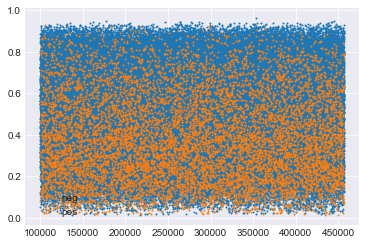

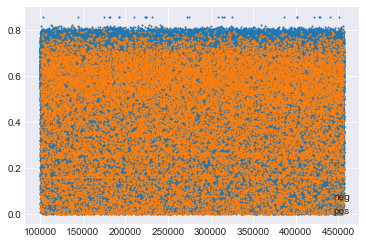

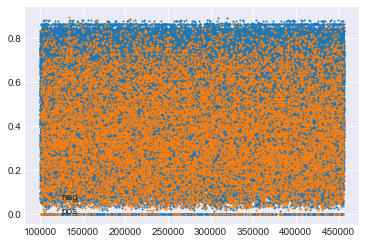

In [8]:
for f in train.filter(regex='EXT_SOURCE').columns:
    plt.scatter(train.SK_ID_CURR[neg], train.loc[neg, f], s=1, label='neg')
    plt.scatter(train.SK_ID_CURR[pos], train.loc[pos, f], s=1, label='pos')
    plt.legend()
    plt.show()

## SOCIAL_CIRCLE

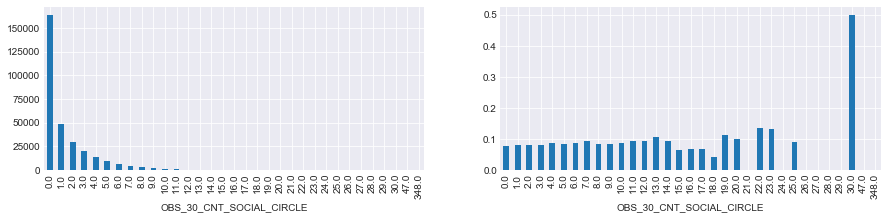

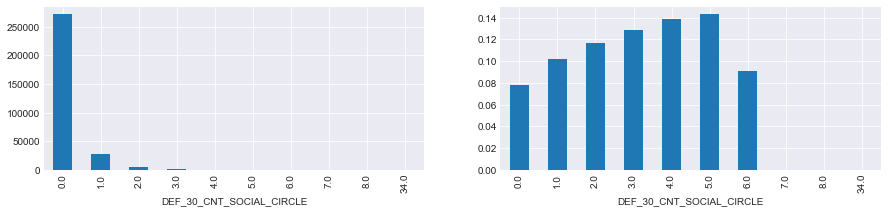

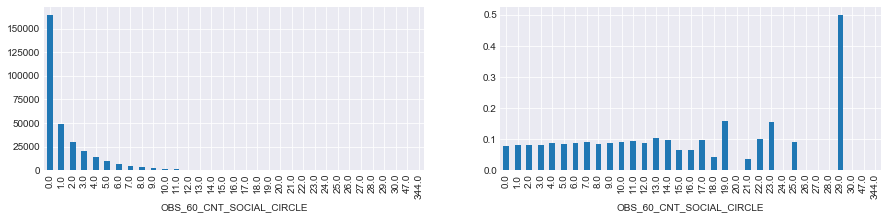

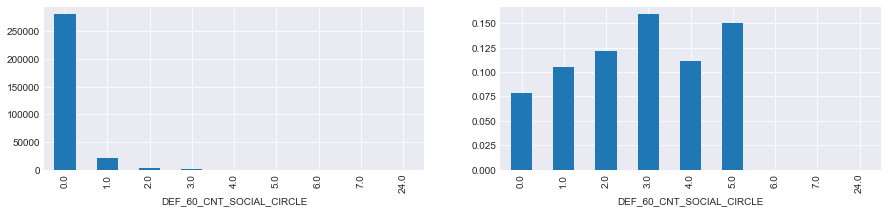

In [110]:
category_summary(train.filter(regex='SOCIAL_CIRCLE').columns)


## AMT_REQ_CREDIT_BUREAU

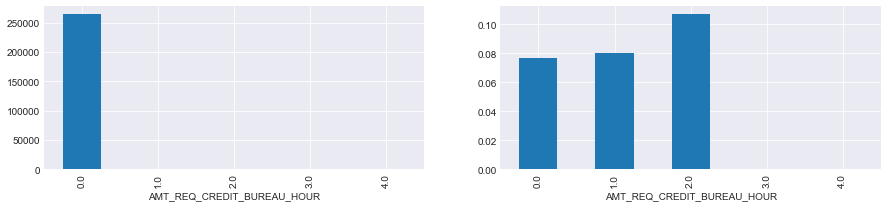

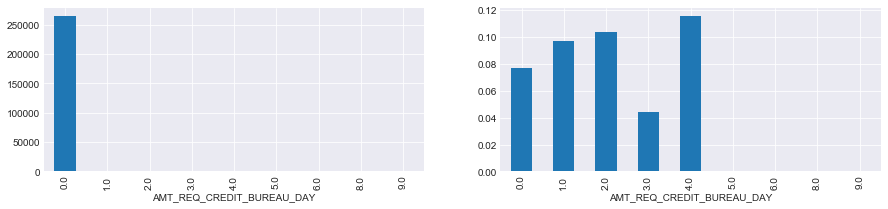

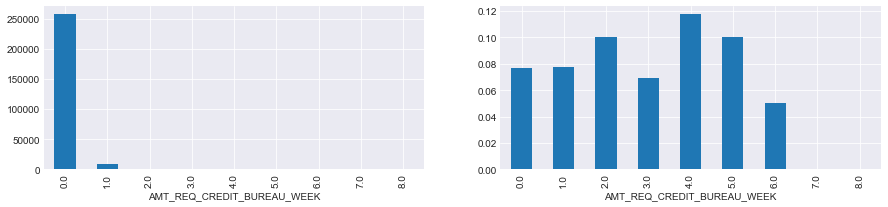

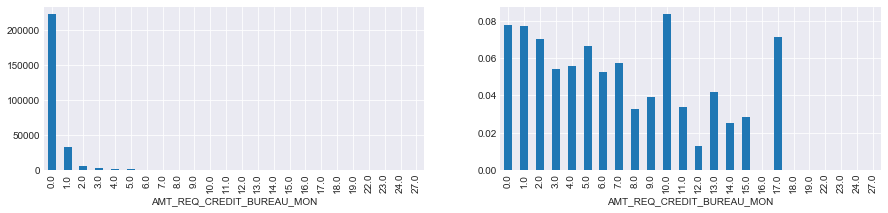

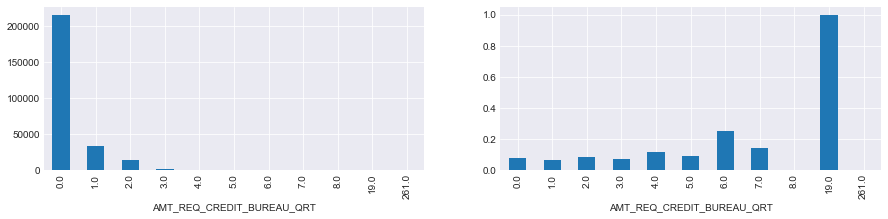

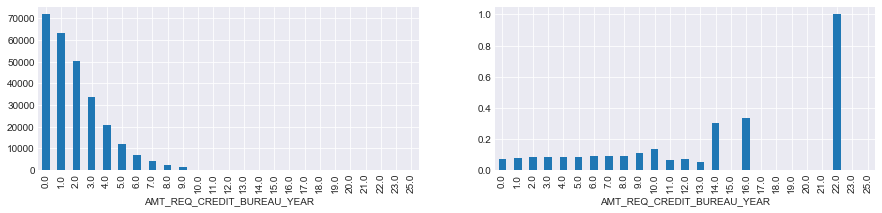

In [112]:
category_summary(train.filter(regex='AMT_REQ_').columns)

## CAR_AGE

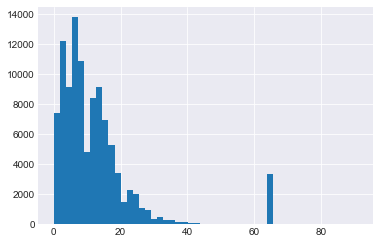

In [118]:
train.OWN_CAR_AGE.hist(bins=50)